# Initialize Environment

In [ ]:
import matplotlib, matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from scipy.stats import norm
from scipy.io import loadmat
import glob
import yfinance as yf
import pandas as pd
import datetime
from copy import deepcopy
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Seed Random number generator for repeatability
np.random.seed(19690720)

plt.style.use('default')
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams.update({'font.size': 18})

# Load Data
## Vanguard

In [ ]:
tickers = [ 'VTSAX', 'VSGAX', 'VGSLX', 'VHYAX', 'VTCLX', 'VTMFX' ]

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

## TSP

In [28]:
import pandas_datareader.tsp as tsp
tspreader = tsp.TSPReader()
tspdata = tspreader.read()

print(type(tspdata), tspdata)
# write the data, in reversed order
#tspdata.iloc[::-1].to_csv('~/Downloads/tsp_shareprices.csv')
tspdata.iloc[::-1].to_excel('~/Downloads/tsp_shareprices.xls', sheet_name='TSP Data')

<class 'pandas.core.frame.DataFrame'>             L Income   L 2020   L 2030   L 2040   L 2050   G Fund   F Fund  \
date                                                                         
2015-05-04   17.7281  23.6224  25.7687  27.5247  15.6904  14.7103  16.9570   
2015-05-05   17.6884  23.4941  25.5860  27.2975  15.5452  14.7111  16.9272   
2015-05-06   17.6835  23.4882  25.5790  27.2897  15.5427  14.7119  16.8826   
2015-05-07   17.6902  23.4958  25.5906  27.3067  15.5503  14.7127  16.9248   
2015-05-08   17.7414  23.6622  25.8216  27.5863  15.7307  14.7135  16.9603   
...              ...      ...      ...      ...      ...      ...      ...   
2020-04-23   20.5242  28.1967  31.3572  33.7805  19.3551  16.4248  20.6907   
2020-04-24   20.5719  28.2665  31.5565  34.0366  19.5223  16.4252  20.6993   
2020-04-27   20.6522  28.3845  31.9059  34.4903  19.8222  16.4264  20.6374   
2020-04-28   20.6644  28.4023  31.9521  34.5510  19.8631  16.4267  20.6880   
2020-04-29   20.7858  28.5

# Derived Data

In [7]:
print(data)
ddata = data.swaplevel(0,1,axis=1).drop(['Open', 'High', 'Low', 'Volume'], axis=1)['Close']
#print(type(data), data.columns, ddata.columns)

#print(type(tspdata), tspdata, tspdata.columns)

                VHYAX                                              VSGAX  \
                 Open       High        Low      Close Volume       Open   
Date                                                                       
2015-04-30        NaN        NaN        NaN        NaN    NaN  44.034222   
2015-05-01        NaN        NaN        NaN        NaN    NaN  44.397892   
2015-05-04        NaN        NaN        NaN        NaN    NaN  44.598869   
2015-05-05        NaN        NaN        NaN        NaN    NaN  43.919357   
2015-05-06        NaN        NaN        NaN        NaN    NaN  43.986355   
...               ...        ...        ...        ...    ...        ...   
2020-04-23  22.809999  22.809999  22.809999  22.809999    0.0  57.799999   
2020-04-24  23.110001  23.110001  23.110001  23.110001    0.0  58.779999   
2020-04-27  23.549999  23.549999  23.549999  23.549999    0.0  60.660000   
2020-04-28  23.629999  23.629999  23.629999  23.629999    0.0  60.639999   
2020-04-29  

# Plot Data
## Vanguard

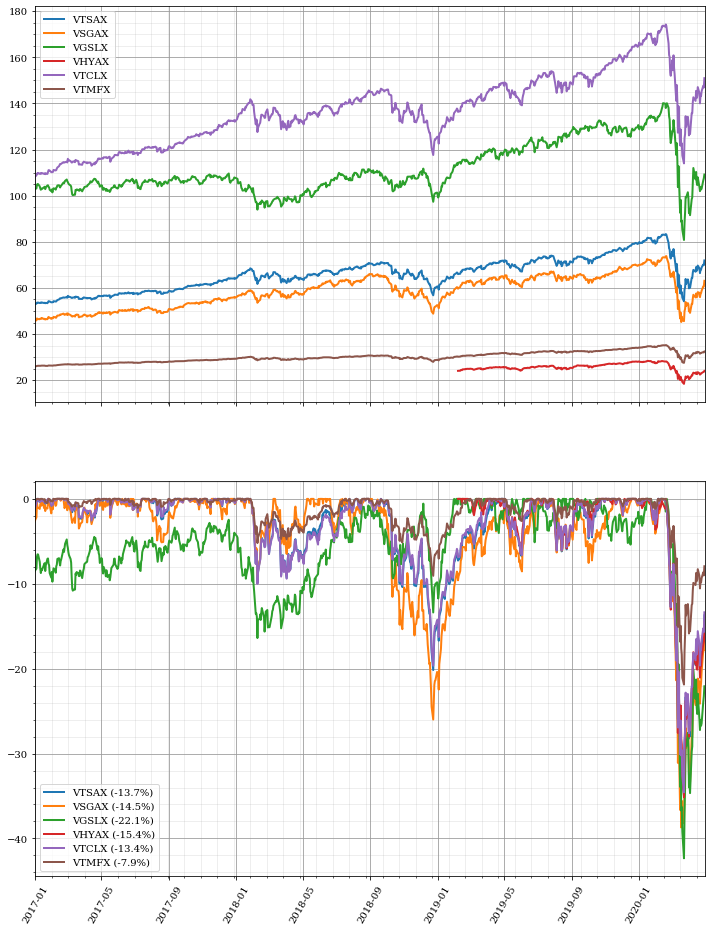

In [13]:
# Compute the drawdown of an array, in place.
def drawdown (array):
    dd=deepcopy(array)
    maxval=-1
    for i in range(len(dd)):
        idx = i
        if array[idx] > maxval: maxval = array[idx]
        dd[idx] = (array[idx]/maxval - 1.) * 100.
    return dd

# Plot the prices & drawdowns over/under
def plot_prices_dd(tickers, data, ax):
    for t in tickers:
        #print(t, data[t].columns)
        #print(t, data[t])
        close = data[t]['Close']
        #print(type(close.index), type(close.values))
        dd = drawdown(close.values)

        ax[0].plot(close.index, close.values, label=t, linewidth=2.0)
        ax[0].grid(b=True, which='major', color='#999999', linestyle='-')
        ax[0].minorticks_on()
        ax[0].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        ax[0].legend(fancybox=True, loc=2)

        ax[1].plot(close.index, dd, label='{} ({:.1f}%)'.format(t,dd[-1]), linewidth=2.0)
        ax[1].grid(b=True, which='major', color='#999999', linestyle='-')
        ax[1].minorticks_on()
        ax[1].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        ax[1].legend(fancybox=True, loc=3)
        ax[1].set_xlim([datetime.date(2017, 1, 1), datetime.date.today()])
        plt.xticks(rotation=60)
    return



###########################################    
fig, ax  = plt.subplots(nrows=2, ncols=1,
                        sharex=True, sharey=False,
                        figsize=(12,8*2))

plot_prices_dd(tickers, data, ax)



#plt.show()
fig.savefig('vg_shareprices.pdf', bbox_inches='tight')

## TSP

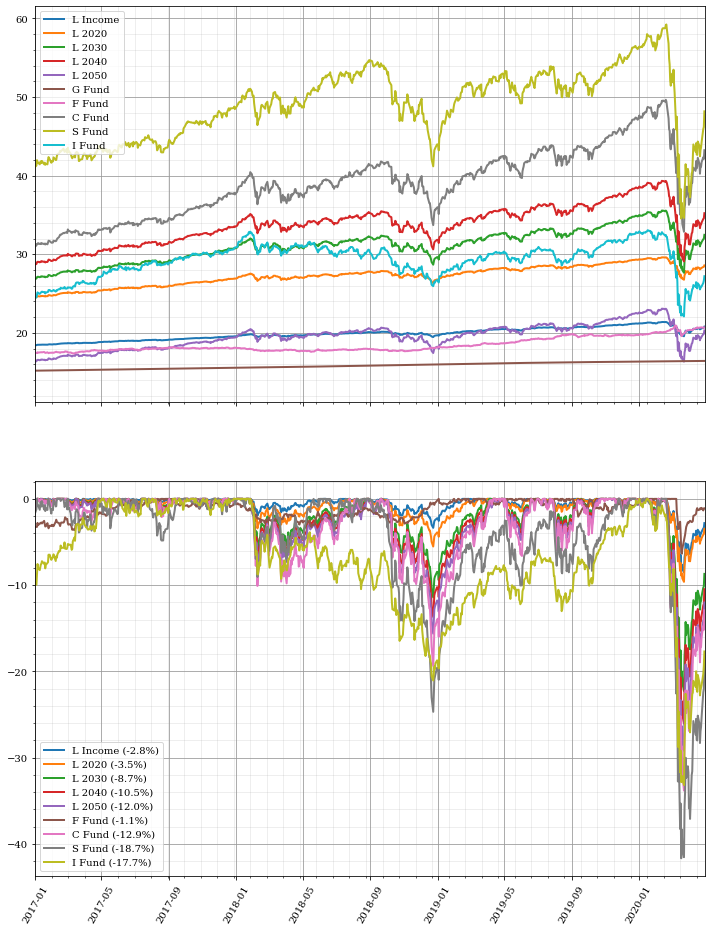

In [14]:
# Plot the prices & drawdowns over/under
def plot_tsp_prices_dd(tspdata, ax):
    for c in tspdata.columns:
        if not c: continue
        close = tspdata[c]
        #print(type(close.index), type(close.values))
        #print(close)
        dd = drawdown(close.values)

        ax[0].plot(close.index, close.values, label=c, linewidth=2.0)
        ax[0].grid(b=True, which='major', color='#999999', linestyle='-')
        ax[0].minorticks_on()
        ax[0].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        ax[0].legend(fancybox=True, loc=2)

        if 'G Fund' in c: continue
        ax[1].plot(close.index, dd, label='{} ({:.1f}%)'.format(c,dd[-1]), linewidth=2.0)
        ax[1].grid(b=True, which='major', color='#999999', linestyle='-')
        ax[1].minorticks_on()
        ax[1].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        ax[1].legend(fancybox=True, loc=3)
        ax[1].set_xlim([datetime.date(2017, 1, 1), datetime.date.today()])
        plt.xticks(rotation=60)
    return



###########################################    
fig, ax  = plt.subplots(nrows=2, ncols=1,
                        sharex=True, sharey=False,
                        figsize=(12,8*2))

plot_tsp_prices_dd(tspdata, ax)
fig.savefig('tsp_shareprices.pdf', bbox_inches='tight')

# Correlations
## Vanguard

(6.0, 0.0)

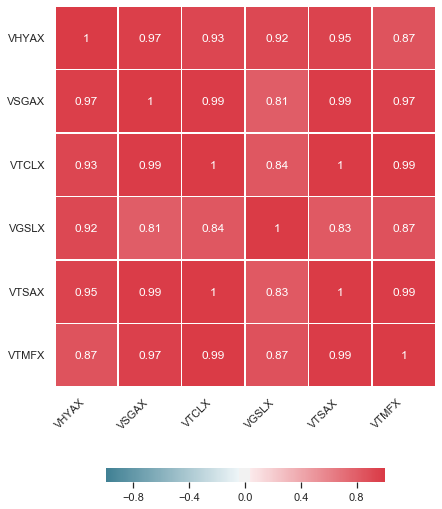

In [20]:
import seaborn as sns

sns.set(style="white")

corr = ddata.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=None, center=0, vmin=-1, vmax=1, cmap=cmap, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5, "orientation": "horizontal"})

ax.set_xlabel(None)
ax.set_ylabel(None)
#ax.set_yticklabels([ item.get_text().strip('Close-') for item in ax.get_yticklabels() ])
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    verticalalignment='center')
ax.set_xticklabels(
    ax.get_yticklabels(),
    rotation=45,
    horizontalalignment='right')
(bottom, top) = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## TSP

(10.0, 0.0)

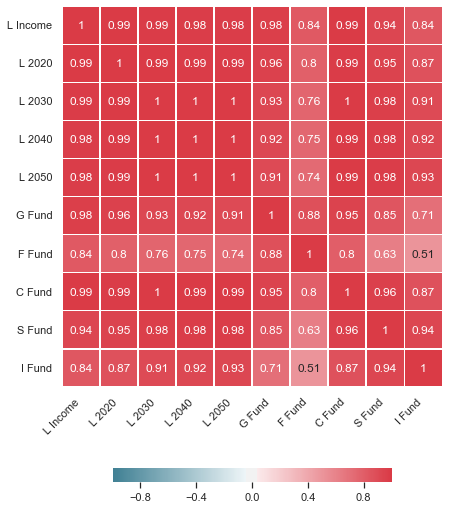

In [21]:
corr = tspdata.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=None, center=0., vmin=-1, vmax=1, cmap=cmap, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5, "orientation": "horizontal"})


ax.set_xlabel(None)
ax.set_ylabel(None)
#ax.set_yticklabels([ item.get_text().strip('Close-') for item in ax.get_yticklabels() ])
ax.set_yticklabels(
    ax.get_yticklabels(),
    verticalalignment='center')
ax.set_xticklabels(
    ax.get_yticklabels(),
    rotation=45,
    horizontalalignment='right')
(bottom, top) = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)